In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fpath = './dataset'

In [4]:
dict_data = {
    "c0":np.arange(1, 4),
    "c1":np.arange(4, 7),
    "c2":np.arange(7, 10),
    "c3":np.arange(10, 13),
    "c4":np.arange(13, 16),
}

df = pd.DataFrame(dict_data, index = ["r0", "r1", "r2"])
print(df)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [11]:
## index 정렬
df.sort_index(ascending = False, inplace = True)
print("df = \n", df)

##value 
print("*"*50)
df.sort_values(by = "c0", ascending = True, inplace = True)
print("df = \n", df)


df = 
     c0  c1  c2  c3  c4
r2   3   6   9  12  15
r1   2   5   8  11  14
r0   1   4   7  10  13
**************************************************
df = 
     c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [14]:
##broadcasting_ipybn 디멘션맞춰주기

titanic = sns.load_dataset("titanic")
titanic.head()
won = titanic["fare"]*1300
titanic.insert(7, "won", won)
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare       won embarked  \
0         0       3    male  22.0      1      0   7.2500   9425.00        S   
1         1       1  female  38.0      1      0  71.2833  92668.29        C   
2         1       3  female  26.0      0      0   7.9250  10302.50        S   
3         1       1  female  35.0      1      0  53.1000  69030.00        S   
4         0       3    male  35.0      0      0   8.0500  10465.00        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True  


In [17]:
titanic.head()
new_df = titanic.loc[:, "fare":"won"]
print(new_df.head())
print("*"*50)
add_df = new_df + 1000
print(add_df.head())

add_df - new_df


      fare       won
0   7.2500   9425.00
1  71.2833  92668.29
2   7.9250  10302.50
3  53.1000  69030.00
4   8.0500  10465.00
**************************************************
        fare       won
0  1007.2500  10425.00
1  1071.2833  93668.29
2  1007.9250  11302.50
3  1053.1000  70030.00
4  1008.0500  11465.00


,fare,won
0,1000.0,1000.0
1,1000.0,1000.0
2,1000.0,1000.0
3,1000.0,1000.0
4,1000.0,1000.0
...,...,...
886,1000.0,1000.0
887,1000.0,1000.0
888,1000.0,1000.0
889,1000.0,1000.0


In [31]:
fname = "vor_r.xlsx"
vor = pd.read_excel(os.path.join(fpath, fname))
print(vor)

vor.set_index("id", inplace=True)
print(vor)
vor.reset_index(inplace=True) 
print(vor)

mean_column = vor.loc[:, "hz0.04":].mean(axis = 1) #axis = 1이어야 행별로계산
mean_column

vor.insert(3, "mean", mean_column)
vor.head()
vor.sort_values(by="mean", ascending=False, inplace = True)
vor.iloc[:10, :4]


vor_df10 = vor.iloc[:10, :4]

    group  id    time    hz0.04    hz0.08     hz0.1    hz0.16    hz0.32  \
0       1   1     Pre  0.213840  0.717955  0.848727  0.850790  0.802738   
1       1   2     Pre  0.345725  0.795440  0.781473  0.924972  0.801245   
2       1   3     Pre  0.376285  0.799327  0.781350  0.777773  0.868007   
3       1   4     Pre  0.451440  0.771083  0.808645  0.787825  0.839985   
4       1   5     Pre  0.287360  0.825547  0.831303  0.818332  0.817320   
..    ...  ..     ...       ...       ...       ...       ...       ...   
59      2  12  Post14  0.079660  0.237193  0.471418  0.474830  0.585082   
60      2  13  Post14  0.085117  0.387700  0.403857  0.583710  0.665262   
61      2  14  Post14  0.058188  0.399475  0.467535  0.648505  0.657350   
62      2  15  Post14  0.098390  0.357222  0.478880  0.456372  0.536233   
63      2  16  Post14  0.117395  0.449813  0.472043  0.571655  0.690753   

      hz0.64       hz1  
0   0.808393  0.738967  
1   0.803880  0.781420  
2   0.868853  0.754252  

In [44]:
##filter 
vor_df10 = vor.iloc[:10, :4]
vor_df10.iloc[5:, 2] = "post"
vor_df10


,id,group,time,mean
13,14,2,Pre,0.807488
7,8,1,Pre,0.805965
6,7,1,Pre,0.798594
8,9,1,Pre,0.794495
12,13,2,Pre,0.780265
11,12,2,post,0.777636
5,6,1,post,0.775674
3,4,1,post,0.758579
14,15,2,post,0.758175
15,16,2,post,0.753647


In [47]:
#boolean 을 인덱스로 넣어주면 True 인것만 보여줌 

idx1 = vor_df10.loc[:, "time"] == "Pre"
print(idx1)

idx2 = vor_df10.loc[:, "mean"] > 0.77
print(idx2)


print(vor_df10[(idx1) & (idx2) & (vor_df10.loc[:, "group"]==1)]) #idx1, idx2 둘 다 true 를 만족하는 것만! 
print("*"*50)
print(vor_df10[(idx1) | (idx2)]) #or 

13     True
7      True
6      True
8      True
12     True
11    False
5     False
3     False
14    False
15    False
Name: time, dtype: bool
13     True
7      True
6      True
8      True
12     True
11     True
5      True
3     False
14    False
15    False
Name: mean, dtype: bool
   id  group time      mean
7   8      1  Pre  0.805965
6   7      1  Pre  0.798594
8   9      1  Pre  0.794495
**************************************************
    id  group  time      mean
13  14      2   Pre  0.807488
7    8      1   Pre  0.805965
6    7      1   Pre  0.798594
8    9      1   Pre  0.794495
12  13      2   Pre  0.780265
11  12      2  post  0.777636
5    6      1  post  0.775674


In [48]:
tips = sns.load_dataset('tips')
print("tips HEAD = \n", tips.head())


tips HEAD = 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


correalation coefficient(상관계수) = 

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


Text(0, 0.5, 'tip($)')

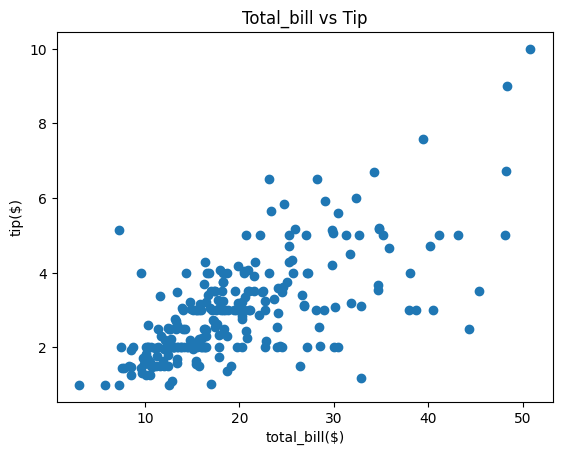

In [49]:
#correlation coefficient 

print("correalation coefficient(상관계수) = \n")
print(tips[["total_bill", "tip"]].corr())

plt.scatter(tips["total_bill"], tips["tip"]) #반드시 x축에원인변수. y는결과변수
# weight , mpg 자리 바뀌면 안됨. 무게가 원인변수고 연비는 결과니까. 
plt.title("Total_bill vs Tip")
plt.xlabel("total_bill($)")
plt.ylabel("tip($)")

In [1]:
#mpg mpg -> kmh =
# Broadcasting  

mpg = sns.load_dataset('mpg')
print(mpg)
print("MPG HEAD = \n", mpg.head())

print("❤️mpg =", mpg.loc[:, "mpg"])
add_kml = mpg["mpg"]*0.425
mpg.insert(1, "kml", add_kml)
print(mpg)



mpg["mpg"] = df["kml"] * 0.425



NameError: name 'sns' is not defined

In [66]:
#USArrest = sns.load_dataset('USArrests')
#print(USArrest)
USArrest1 = sns.get_dataset_names()
print(USArrest1)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
